### Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

#### Read the dataset

In [2]:
df = pd.read_csv('D:/Programming/Data_Science/Codes/4_EDA/static/StudentsPerformance.csv')

###  Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### Check Missing Values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Conclusion: There is no missing values.

#### Check Duplicates

In [7]:
df.duplicated().sum()

0

### Conclusion: There is no duplicate values.

#### Check data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Conclusion
- From the above description of numerical data,all means are very close to each other- between 66 and 69.
- All the standard deviation are also close- between 14.6- 15.19.
- While there is a minimum of 0 for maths, reading having 17 and writing having 10 value.

#### Check various categories present in the different categorical column

In [11]:
# Aggregating numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [12]:
numerical_features

['math score', 'reading score', 'writing score']

In [13]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [14]:
for feature in categorical_features:
    print('-' * 20)
    print("Feature:", feature)
    print(df[feature].unique())
    print(df[feature].value_counts())
    print('-' * 20)

--------------------
Feature: gender
['female' 'male']
female    518
male      482
Name: gender, dtype: int64
--------------------
--------------------
Feature: race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
--------------------
--------------------
Feature: parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
--------------------
--------------------
Feature: lunch
['standard' 'free/reduced']
standard        645
free/reduced    355
Name: lunch, dtype: int64
--------------------
--------------------
Feature: test preparation course
['none' 'completed']
none         642
compl

#### Adding new column **total Score** and **average**

In [15]:
df['total_score'] = (df['math score'] + df['reading score'] + df['writing score'])
df['average_score'] = df['total_score'] / 3

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Average performance based on gender

<Axes: xlabel='average_score', ylabel='Count'>

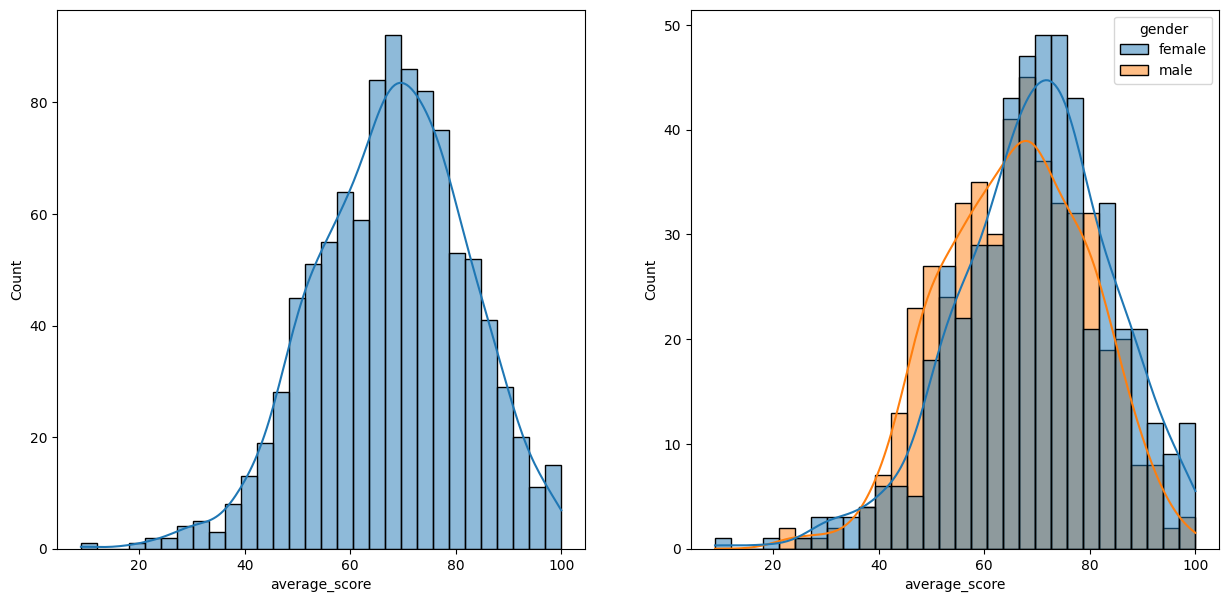

In [17]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True)
plt.subplot(1, 2, 2)
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, hue = 'gender')

### Conclusion: Female students tends to perform well than male students.

#### Average performance based on lunch given to each gender

<Axes: xlabel='average_score', ylabel='Count'>

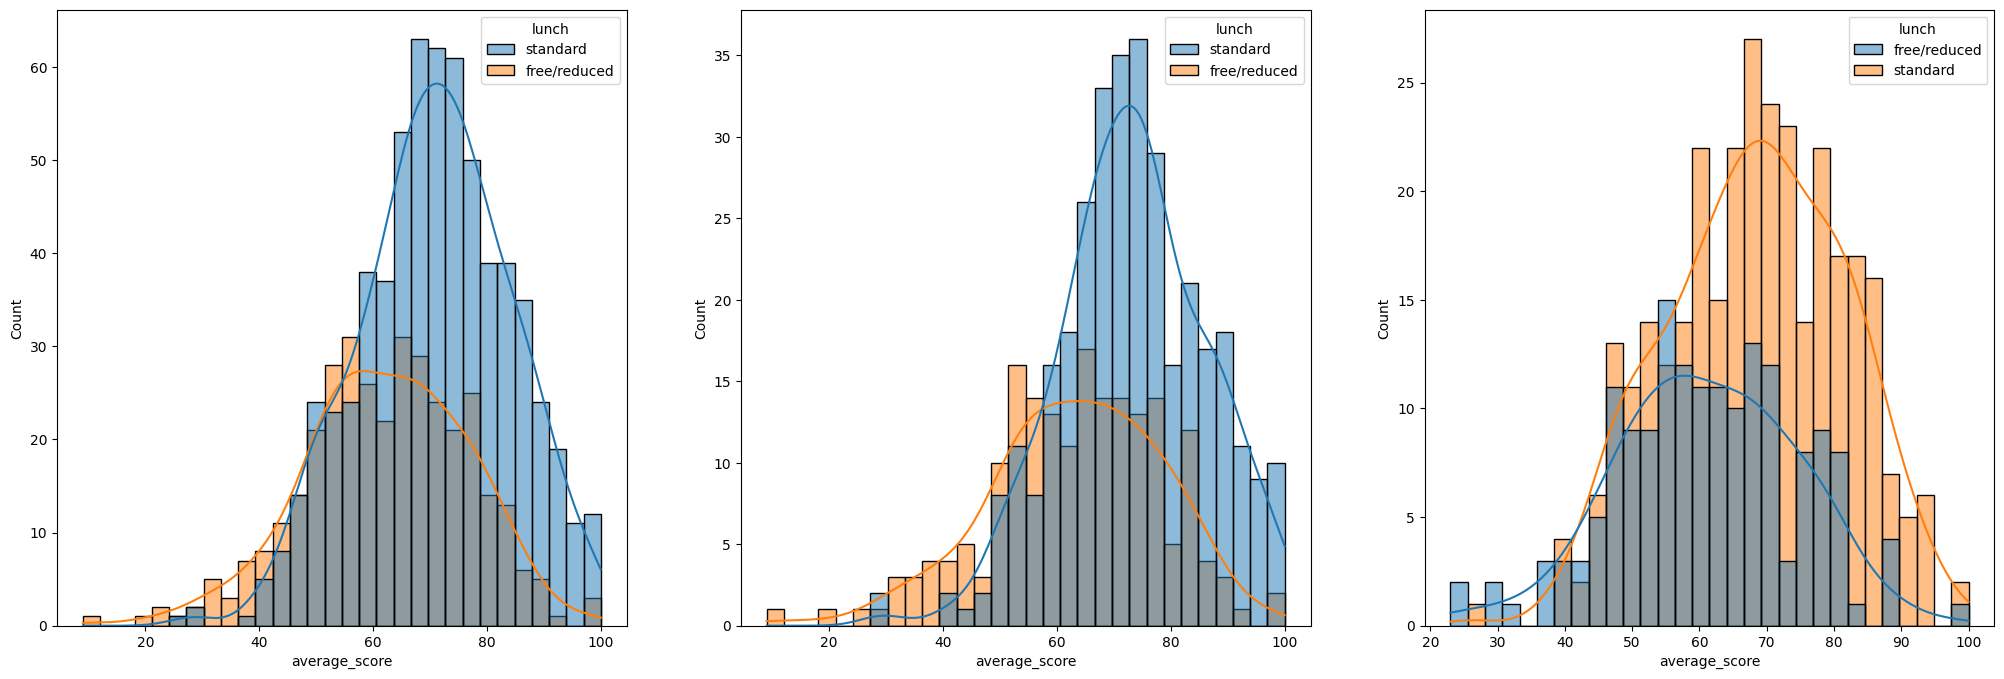

In [18]:
fig, axis = plt.subplots(1, 3, figsize = (25, 8))
plt.subplot(1, 3, 1)
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, hue = 'lunch')
plt.subplot(1, 3, 2)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', bins = 30, kde = True, hue = 'lunch')
plt.subplot(1, 3, 3)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', bins = 30, kde = True, hue = 'lunch')

### Conclusion: Standard lunch helps students perform well in exams, be it female or male.

#### Performance of student based on parental level of education

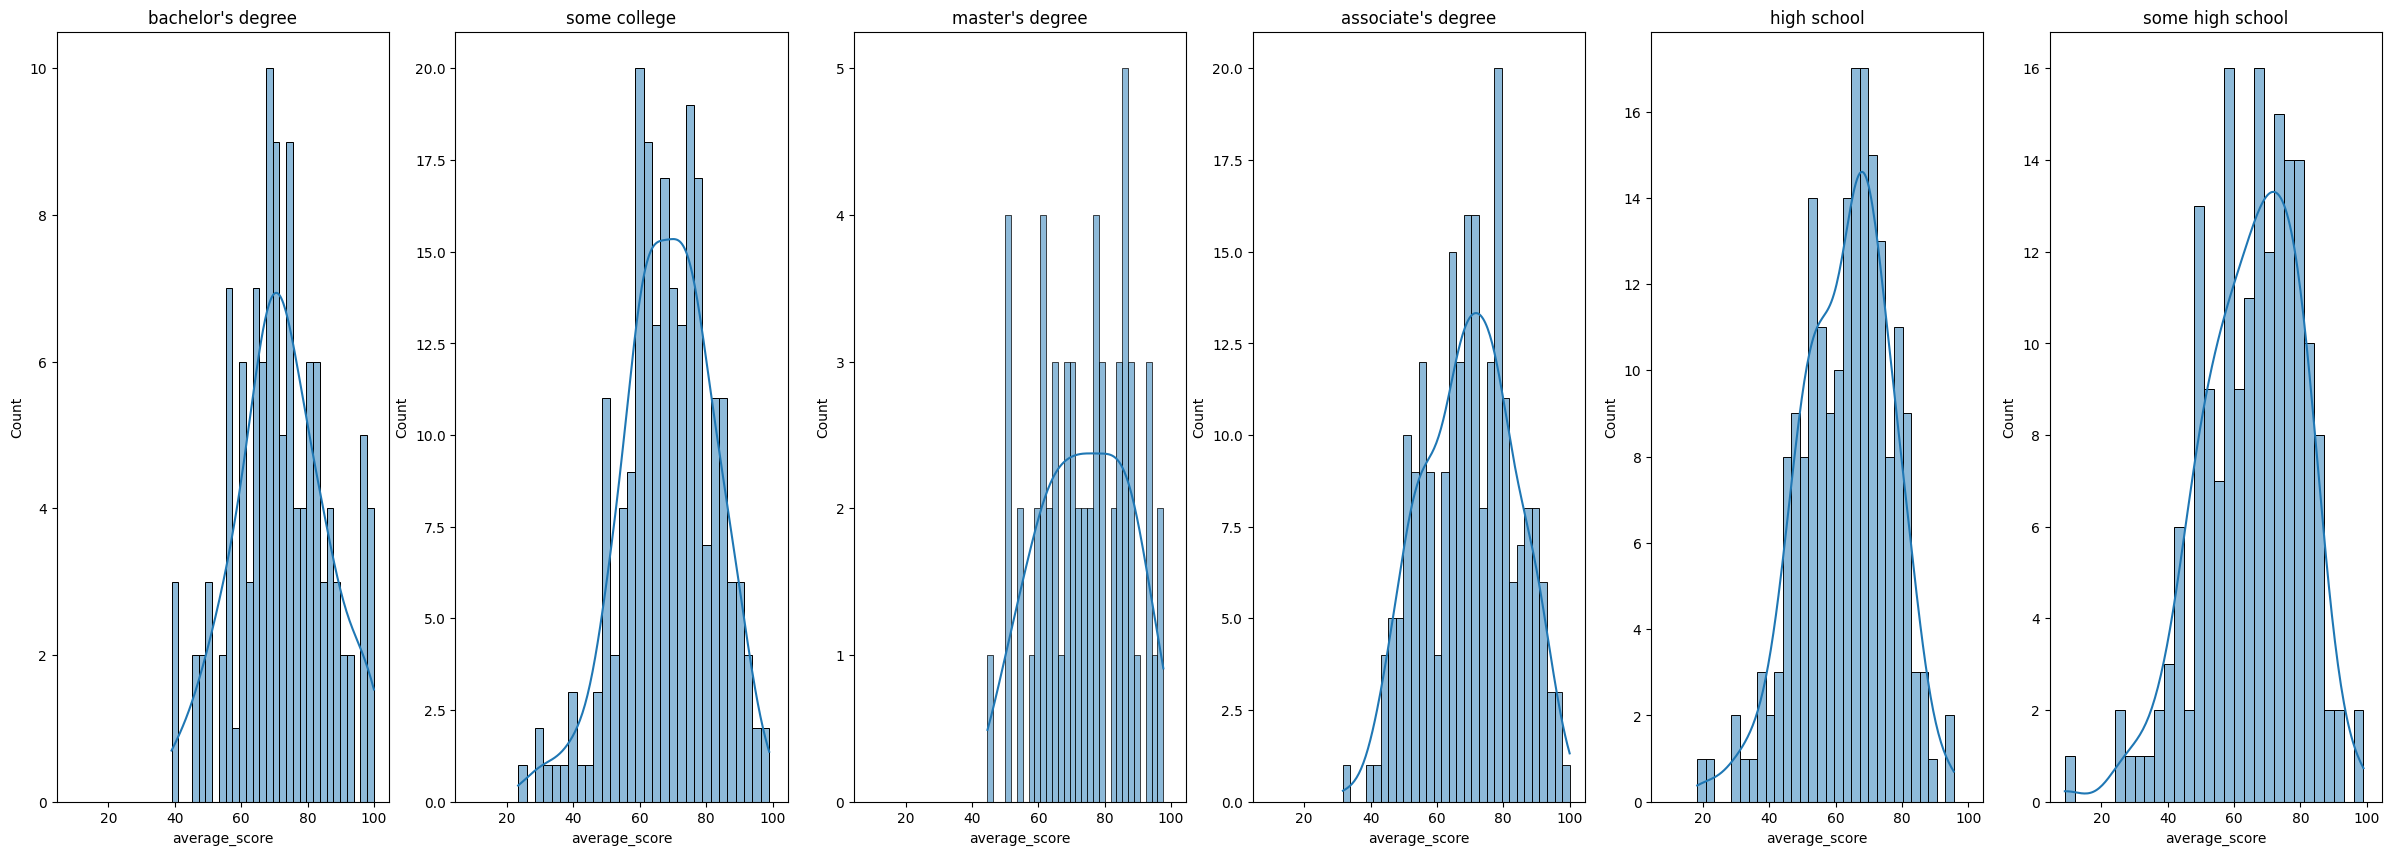

In [19]:
columns = df['parental level of education'].unique()
fig, axis = plt.subplots(1, len(columns), figsize = (30, 10), sharex = True)
for column_idx in range(len(columns)):
    plt.subplot(1, len(columns), column_idx + 1)
    sns.histplot(data = df[df['parental level of education'] == columns[column_idx]], x = 'average_score', bins = 30, kde = True)
    plt.title(columns[column_idx])

### Conclusion: In general parent's education don't help student perform well in exam.

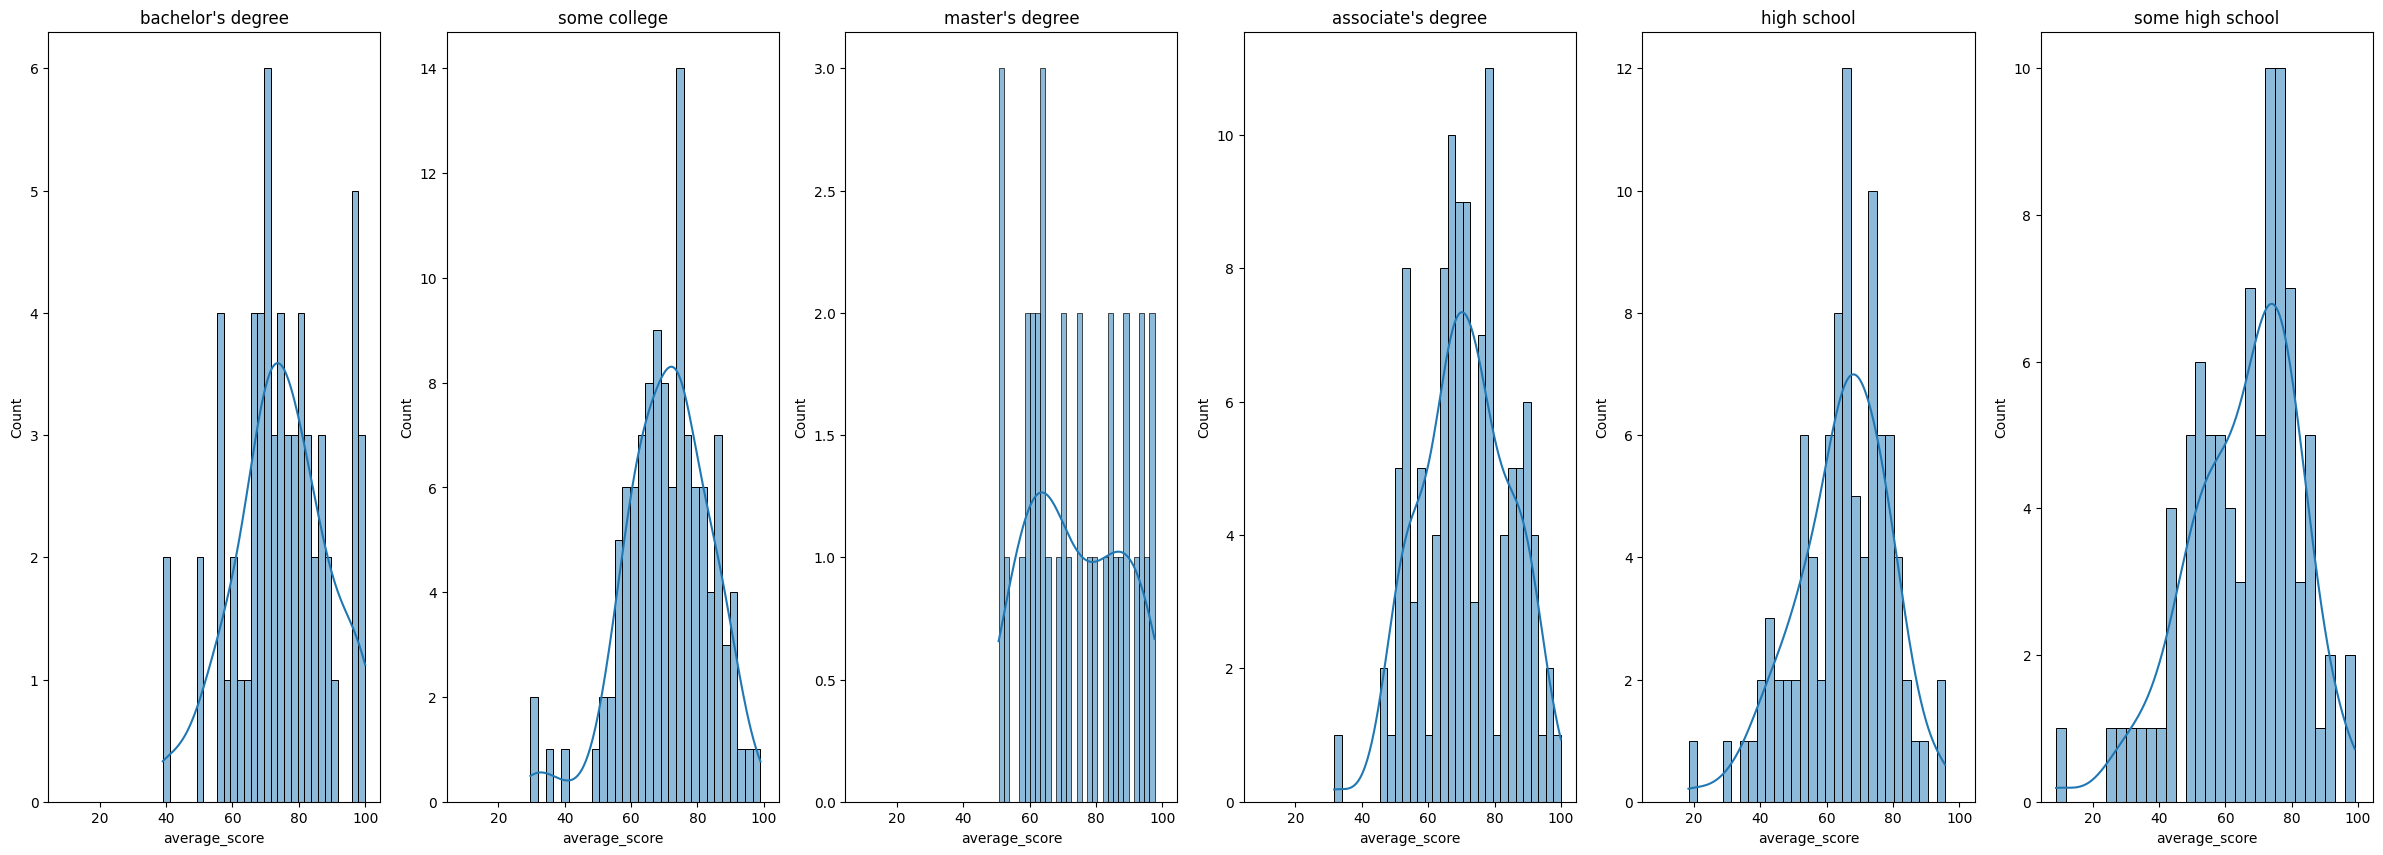

In [20]:
columns = df['parental level of education'].unique()
fig, axis = plt.subplots(1, len(columns), figsize = (30, 10), sharex = True)
for column_idx in range(len(columns)):
    plt.subplot(1, len(columns), column_idx + 1)
    sns.histplot(data = df[(df['parental level of education'] == columns[column_idx]) & (df['gender'] == 'female')], x = 'average_score', bins = 30, kde = True)
    plt.title(columns[column_idx])

### Conclusion: In general we can see there is no effect of parent's education on female students.

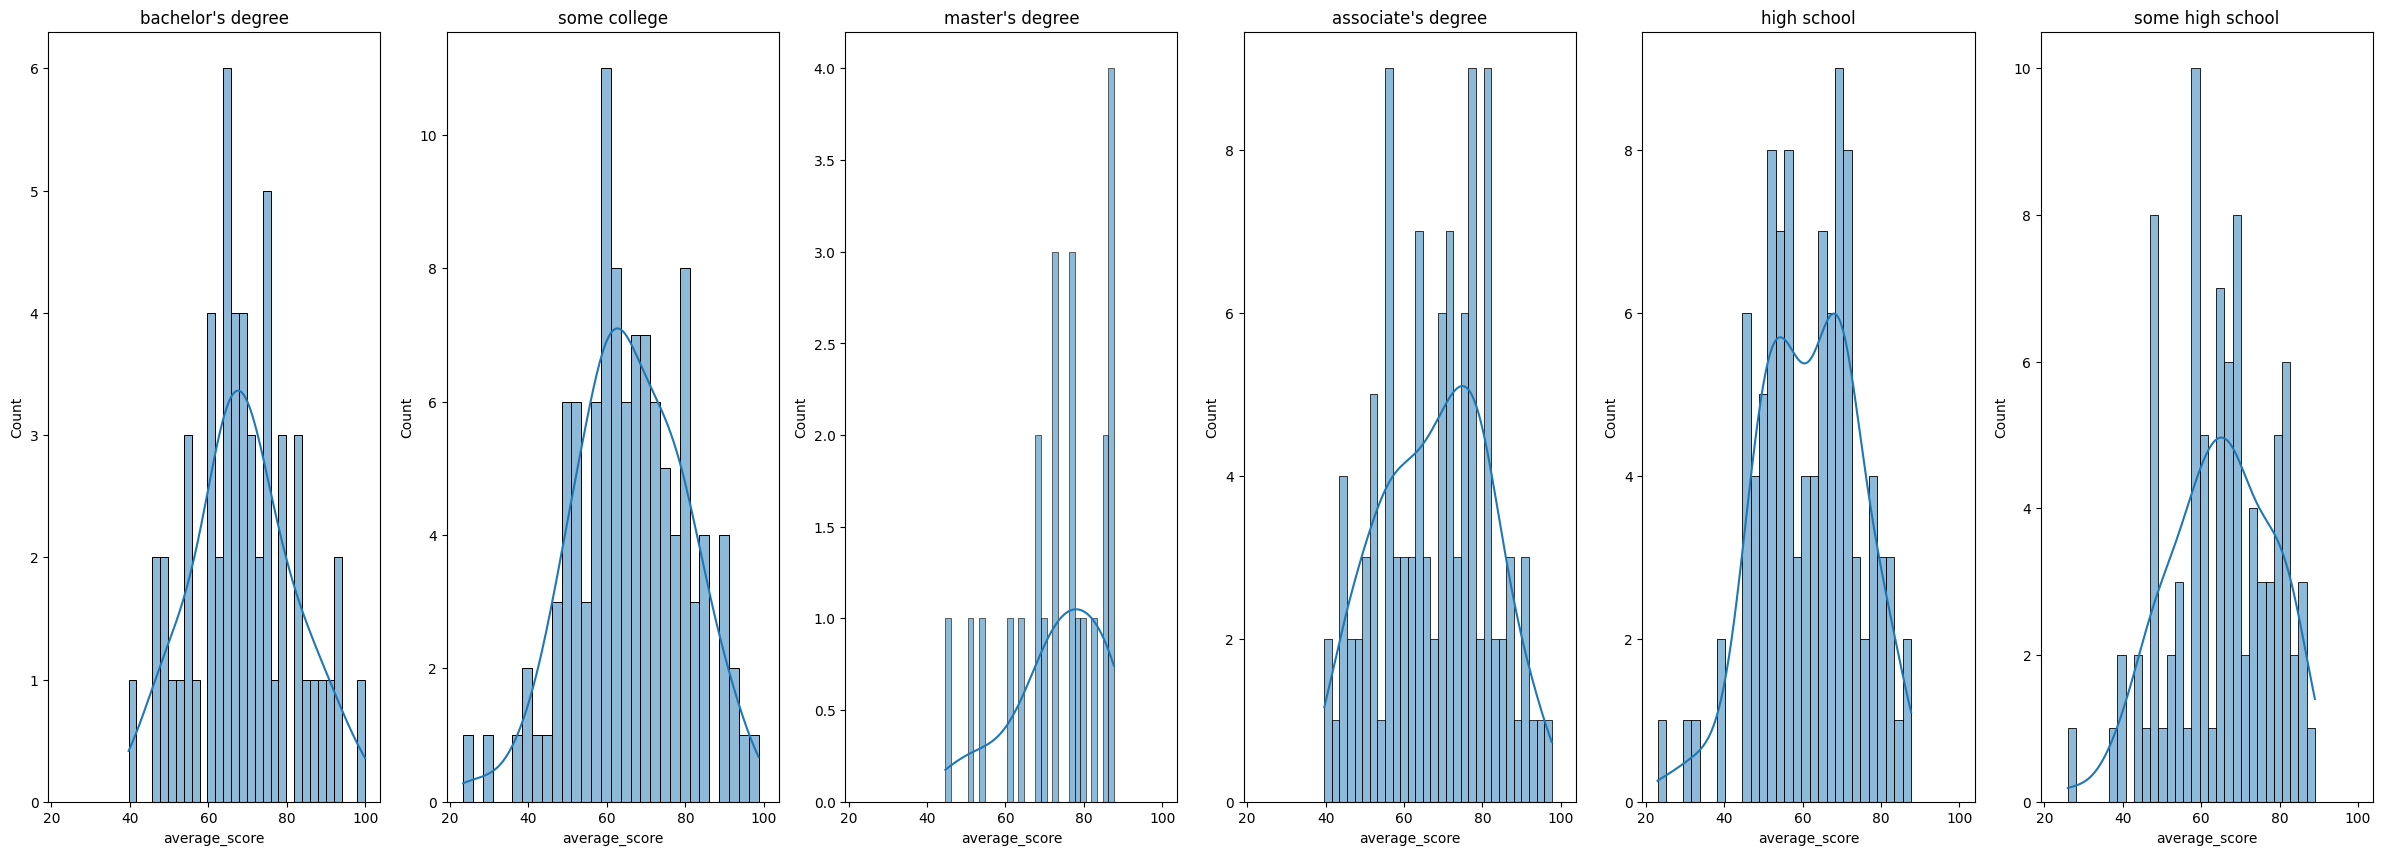

In [32]:
columns = df['parental level of education'].unique()
fig, axis = plt.subplots(1, len(columns), figsize = (30, 10), sharex = True)
for column_idx in range(len(columns)):
    plt.subplot(1, len(columns), column_idx + 1)
    sns.histplot(data = df[(df['parental level of education'] == columns[column_idx]) & (df['gender'] == 'male')], x = 'average_score', bins = 30, kde = True)
    plt.title(columns[column_idx])

### Conclusion: In general we can see that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.

#### Performance of student based on race/ethinicity

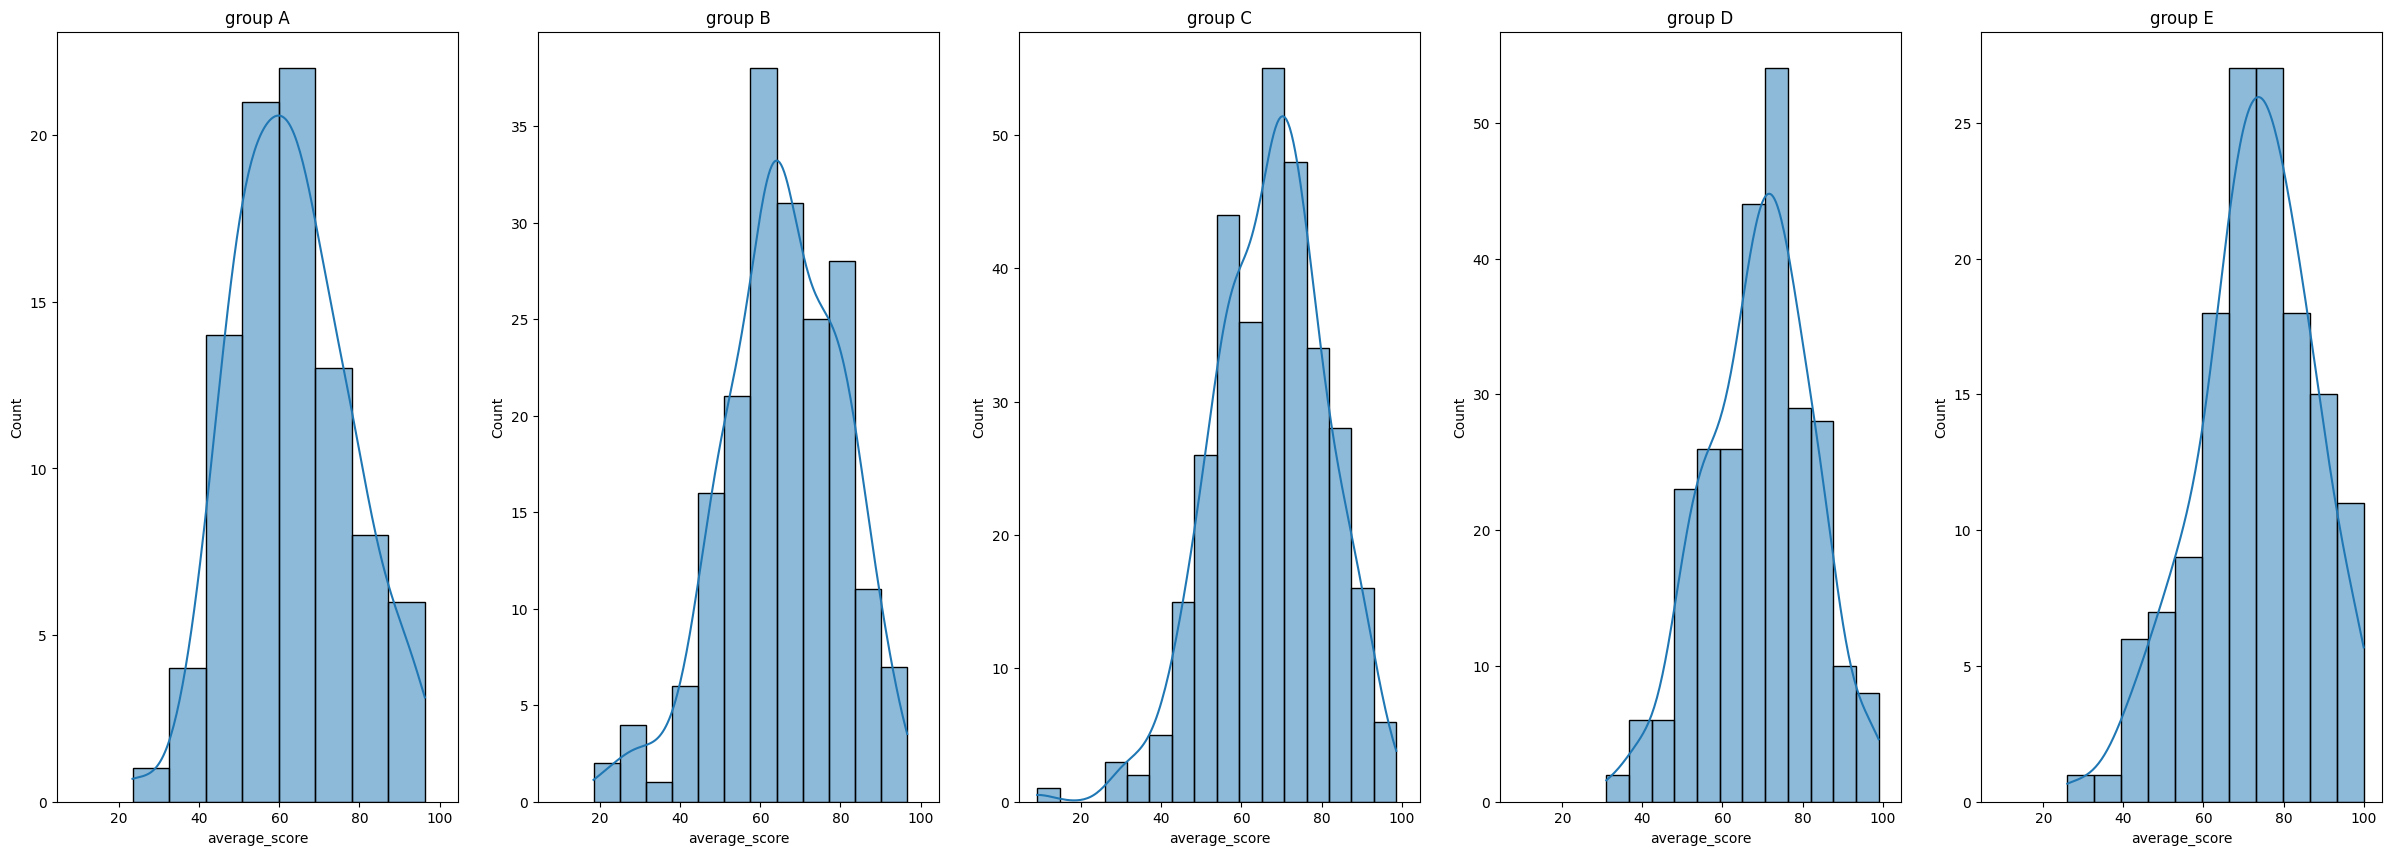

In [33]:
columns = np.sort(df['race/ethnicity'].unique())
fig, axis = plt.subplots(1, len(columns), figsize = (30, 10), sharex = True)
for column_idx in range(len(columns)):
    plt.subplot(1, len(columns), column_idx + 1)
    sns.histplot(data = df[df['race/ethnicity'] == columns[column_idx]], x = 'average_score', kde = True)
    plt.title(columns[column_idx])

### Conclusion: Students of group A and group B tends to perform poorly in exam.

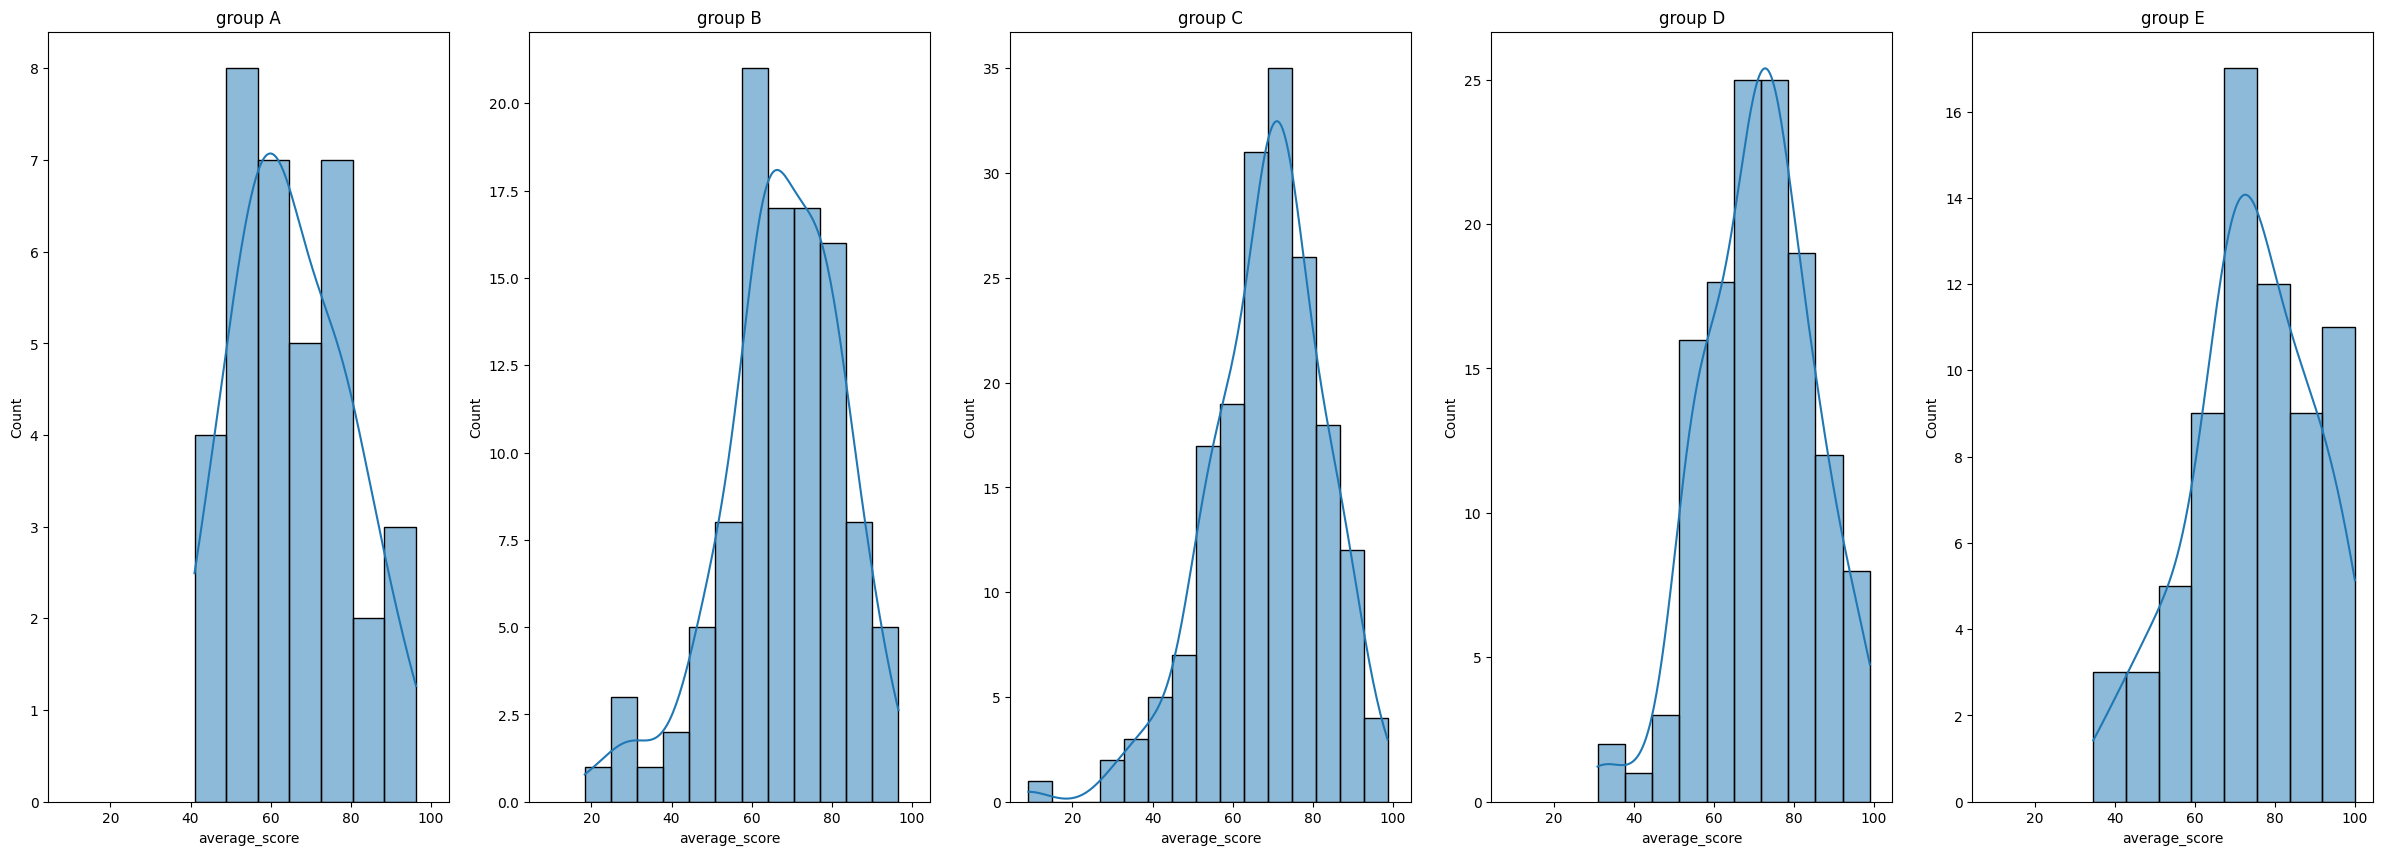

In [36]:
columns = np.sort(df['race/ethnicity'].unique())
fig, axis = plt.subplots(1, len(columns), figsize = (30, 10), sharex = True)
for column_idx in range(len(columns)):
    plt.subplot(1, len(columns), column_idx + 1)
    sns.histplot(data = df[(df['race/ethnicity'] == columns[column_idx]) & (df['gender'] == 'female')], x = 'average_score', kde = True)
    plt.title(columns[column_idx])

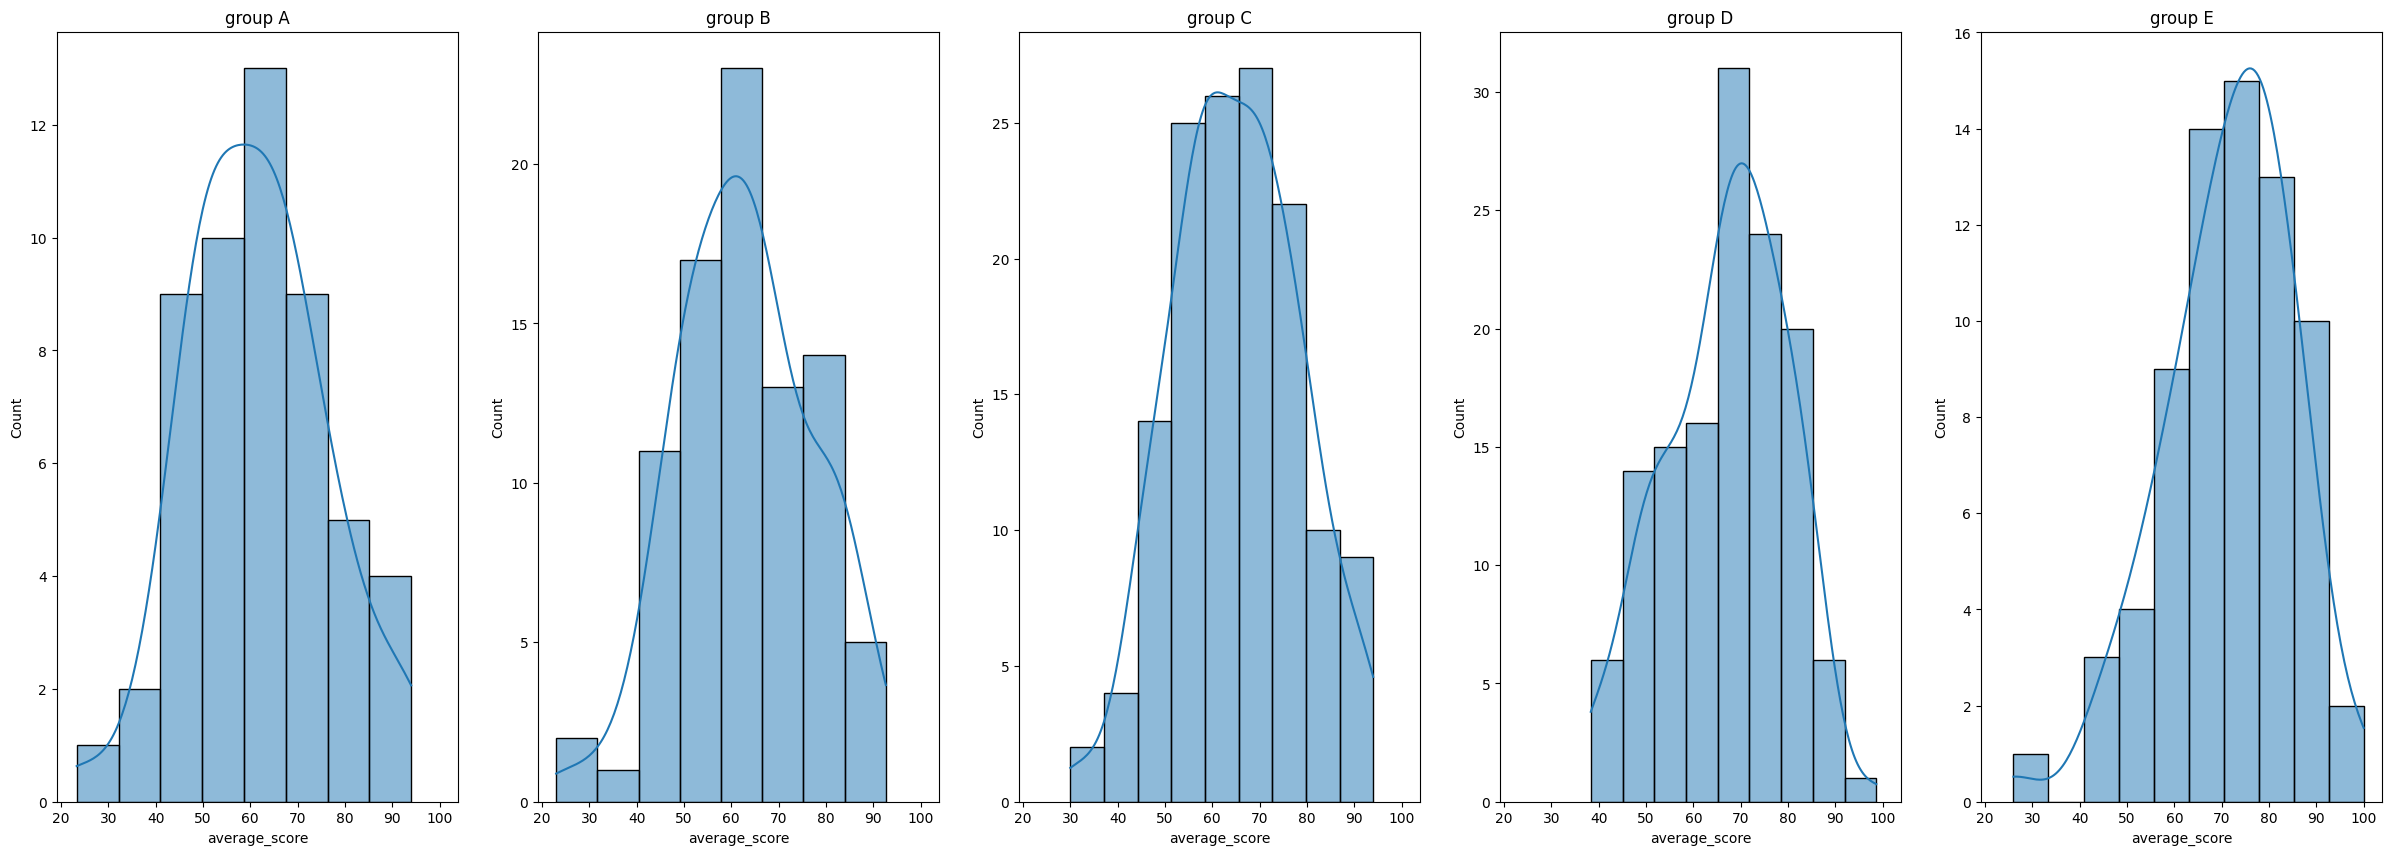

In [37]:
columns = np.sort(df['race/ethnicity'].unique())
fig, axis = plt.subplots(1, len(columns), figsize = (30, 10), sharex = True)
for column_idx in range(len(columns)):
    plt.subplot(1, len(columns), column_idx + 1)
    sns.histplot(data = df[(df['race/ethnicity'] == columns[column_idx]) & (df['gender'] == 'male')], x = 'average_score', kde = True)
    plt.title(columns[column_idx])

### Conclustion: Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

In [42]:
# Aggregating numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [43]:
numerical_features

['math score',
 'reading score',
 'writing score',
 'total_score',
 'average_score']

In [45]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

<Axes: >

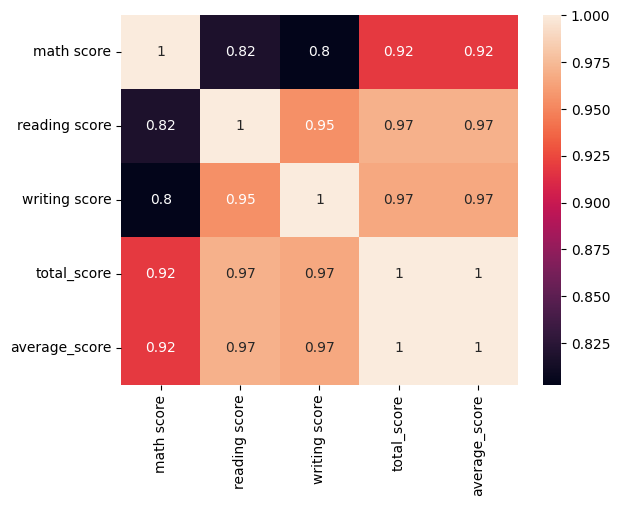

In [47]:
sns.heatmap(df[numerical_features].corr(), annot = True)